In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from plotnine import *

# Leitura dos dados e visualização do conteúdo

In [2]:
# carregar os dados do dataframe
df = pd.read_csv('movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.shape

(5043, 28)

In [5]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

# Análise Exploratória

In [7]:
# descartar coluna do link do imdb do filme
df.drop('movie_imdb_link', axis=1, inplace=True)

In [8]:
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [9]:
# descartar coluna color
df.drop('color', axis=1, inplace=True)

In [10]:
df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [11]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
# descartar linhas com valores faltantes (desde que não seja um número muito alto)
df.dropna(axis =0, subset = ['director_name', 'num_critic_for_reviews',
                               'duration','director_facebook_likes','actor_3_facebook_likes',
                               'actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name',
                               'facenumber_in_poster','num_user_for_reviews','language','country',
                               'actor_2_facebook_likes','plot_keywords', 'title_year'], inplace=True)

In [13]:
df.shape

(4737, 26)

In [14]:
df['content_rating'].value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [15]:
df['content_rating'].fillna('R', inplace=True)

In [16]:
df['aspect_ratio'].value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
2.76        3
2.40        3
1.75        3
1.50        2
2.55        2
1.77        1
1.18        1
2.24        1
1.44        1
1.20        1
Name: aspect_ratio, dtype: int64

In [17]:
#substituir os valores faltantes pela mediana dos valores
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

In [18]:
df['gross'].fillna(df['gross'].median(), inplace=True)

In [19]:
df['budget'].fillna(df['budget'].median(), inplace=True)

In [20]:
df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [21]:
df.duplicated().sum()

42

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(4695, 26)

In [24]:
df['language'].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Hebrew           4
Persian          4
Norwegian        4
Swedish          4
Dutch            4
Thai             3
Arabic           3
Dari             2
Aboriginal       2
Indonesian       2
None             2
Zulu             2
Czech            1
Romanian         1
Vietnamese       1
Dzongkha         1
Polish           1
Maya             1
Filipino         1
Icelandic        1
Kazakh           1
Hungarian        1
Bosnian          1
Telugu           1
Aramaic          1
Mongolian        1
Greek            1
Name: language, dtype: int64

In [25]:
df.drop('language', axis=1, inplace=True)

In [26]:
df.drop('country', axis=1, inplace=True)

In [27]:
# criar uma nova coluna 
df['Profit'] = df['budget'].sub(df['gross'], axis=0)

In [28]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [29]:
df['Profit_Percentage'] = (df['Profit']/df['gross'])*100

In [30]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743


In [31]:
# salvar os dados do dataframe em um arquivo csv
df.to_csv('dados_imd_analise_exploratoria.csv', index=False)

# Visualização dos dados

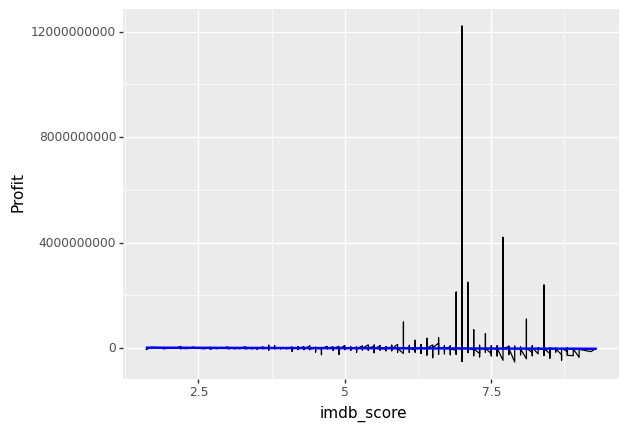

<ggplot: (134593292264)>

In [33]:
# gráfico que correlaciona lucro e nota do IMDB
ggplot(aes(x='imdb_score', y='Profit'), df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=1)

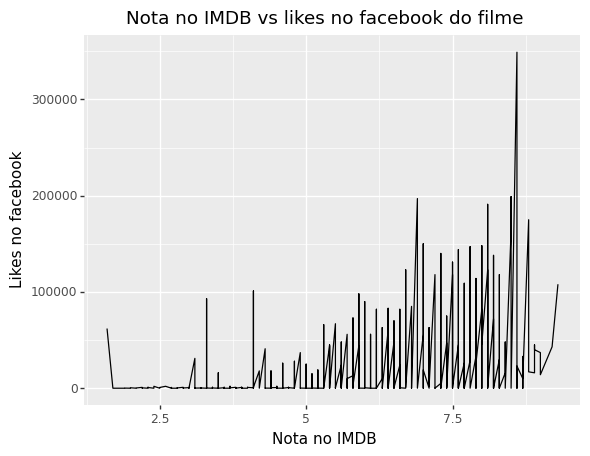

<ggplot: (134593336739)>

In [34]:
# gráfico que correlaciona likes no facebook do filme e nota do IMDB
(ggplot(df)+\
    aes(x='imdb_score', y='movie_facebook_likes') +\
    geom_line() +\
    labs(title='Nota no IMDB vs likes no facebook do filme', x='Nota no IMDB', y='Likes no facebook')
)

C:\Users\User\Workshop_ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


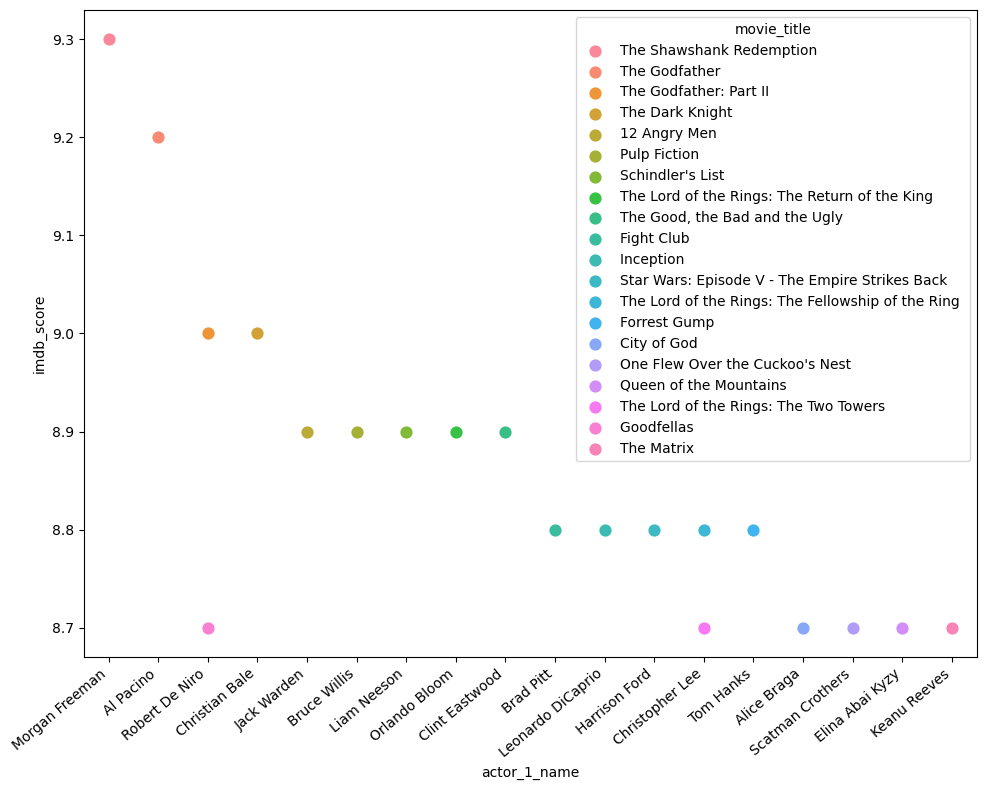

In [35]:
# gráfico dos 20 filmes com melhor nota com relação aos atores principais
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

df= df.sort_values(by ='imdb_score' , ascending=False)
df2=df.head(20)
ax=sns.pointplot(df2['actor_1_name'], df2['imdb_score'], hue=df2['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Preparação dos dados

In [36]:
df.drop(columns=['director_name', 'actor_1_name', 'actor_2_name', 
                 'actor_3_name', 'plot_keywords', 'movie_title'], axis=1, inplace=True)

In [37]:
df['genres'].value_counts()

Drama                                       209
Comedy                                      186
Comedy|Drama|Romance                        182
Comedy|Drama                                180
Comedy|Romance                              149
                                           ... 
Biography|Crime|Drama|Mystery|Thriller        1
Comedy|Drama|Music|Musical|Romance            1
Biography|Comedy|Musical|Romance|Western      1
Crime|Drama|Fantasy|Romance                   1
Action|Animation|Comedy|Family|Fantasy        1
Name: genres, Length: 875, dtype: int64

In [38]:
df.drop('genres', axis=1, inplace=True)

In [39]:
df.drop(columns=['Profit', 'Profit_Percentage'], axis=1, inplace=True)

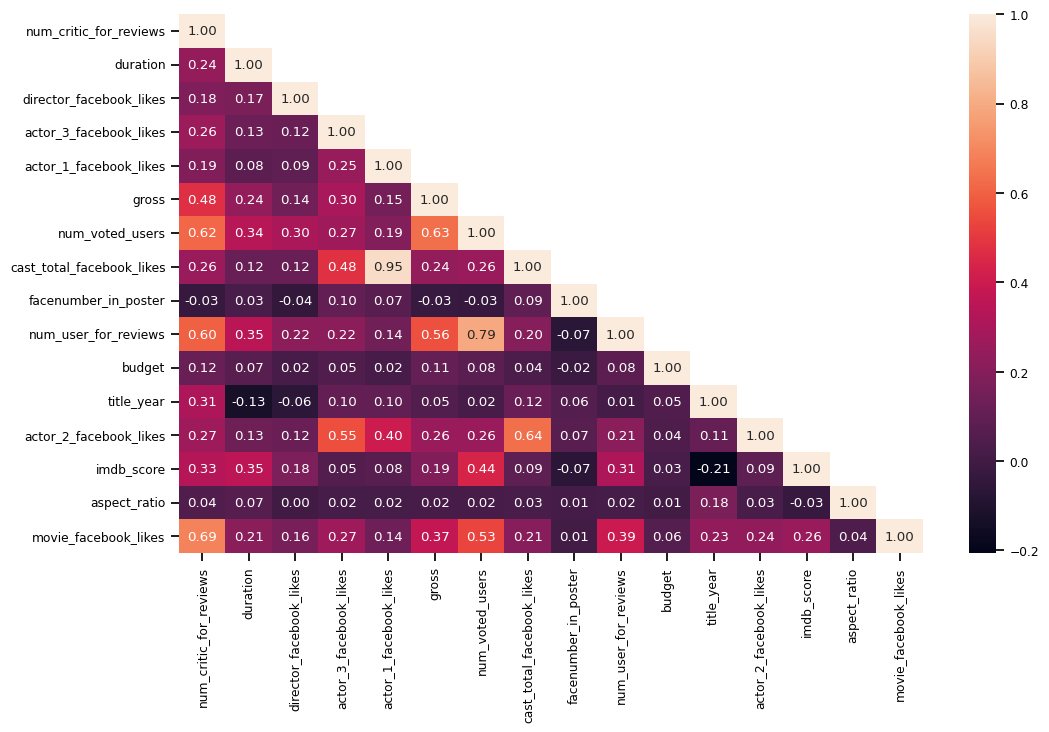

In [40]:
# verificar se existem colunas fortemente correlacionadas
import numpy as np

corr = df.corr()
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(12,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

In [41]:
df['Other_actors_facebook_likes'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

In [42]:
df.drop(columns=['actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes'], axis=1, inplace=True)

In [43]:
df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']

In [44]:
df.drop(columns=['num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)

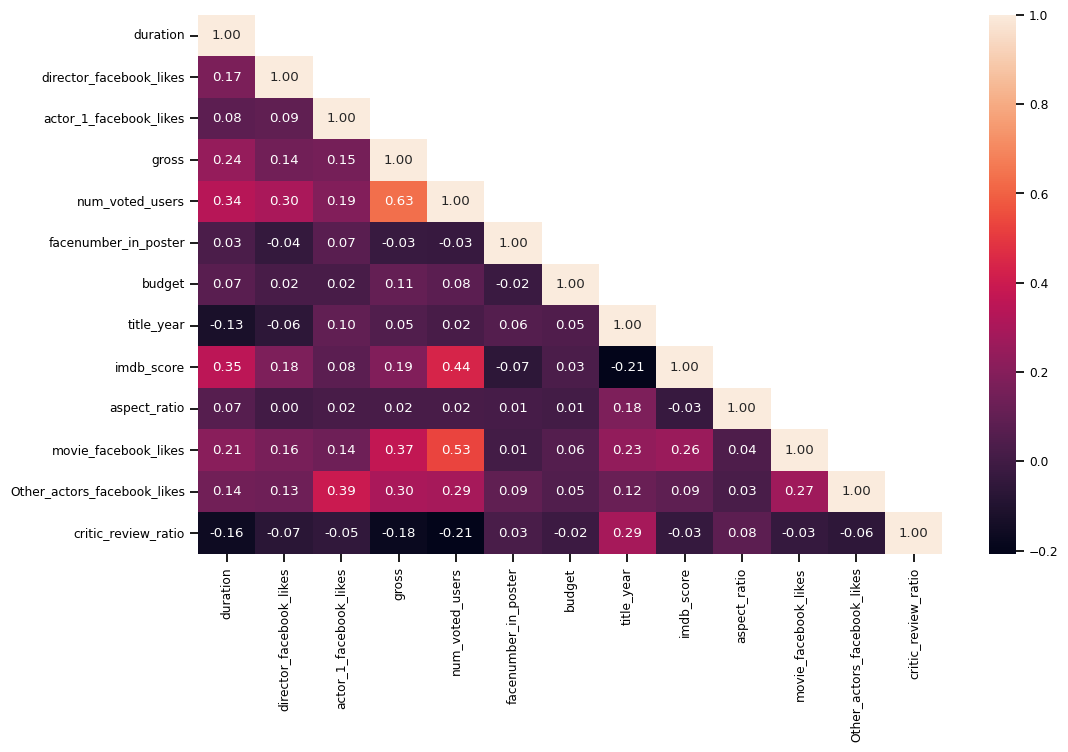

In [45]:
# verificar se ainda existem colunas fortemente relacionadas
corr = df.corr()
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(12,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

In [46]:
# categorizar os valores de nota do imdb
df['imdb_binned_score']=pd.cut(df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [47]:
# criar novas colunas para transformar os valores categóricos de 'content rating' (classificação indicativa) 
#em valores numéricos
df = pd.get_dummies(data = df, columns=['content_rating'], prefix=['content_rating'], drop_first=True)

In [48]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,25000000.0,1994.0,9.3,1.85,...,0,0,0,0,1,0,0,0,0,0
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,6000000.0,1972.0,9.2,1.85,...,0,0,0,0,1,0,0,0,0,0
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,13000000.0,1974.0,9.0,1.85,...,0,0,0,0,1,0,0,0,0,0
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,185000000.0,2008.0,9.0,2.35,...,0,0,1,0,0,0,0,0,0,0
4822,96.0,0.0,359.0,26005908.0,447785,1.0,350000.0,1957.0,8.9,1.66,...,1,0,0,0,0,0,0,0,0,0


In [49]:
df.to_csv('dados_imdb_com_nota.csv', index=False)

In [50]:
X = pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross',
                        'num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio',
                        'movie_facebook_likes','Other_actors_facebook_likes','critic_review_ratio',
                        'content_rating_G','content_rating_GP',
                        'content_rating_M','content_rating_NC-17','content_rating_Not Rated',
                        'content_rating_PG','content_rating_PG-13','content_rating_Passed',
                        'content_rating_R','content_rating_TV-14','content_rating_TV-G',
                        'content_rating_TV-PG','content_rating_Unrated','content_rating_X'], data=df)

In [51]:
y = pd.DataFrame(columns=['imdb_binned_score'], data=df)

In [52]:
# dividir os dados em treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70:30 para treino e teste

In [53]:
# normalizar os dados
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [54]:
X.isna().sum()

duration                       0
director_facebook_likes        0
actor_1_facebook_likes         0
gross                          0
num_voted_users                0
facenumber_in_poster           0
budget                         0
title_year                     0
aspect_ratio                   0
movie_facebook_likes           0
Other_actors_facebook_likes    0
critic_review_ratio            0
content_rating_G               0
content_rating_GP              0
content_rating_M               0
content_rating_NC-17           0
content_rating_Not Rated       0
content_rating_PG              0
content_rating_PG-13           0
content_rating_Passed          0
content_rating_R               0
content_rating_TV-14           0
content_rating_TV-G            0
content_rating_TV-PG           0
content_rating_Unrated         0
content_rating_X               0
dtype: int64

In [56]:
# importar, configurar e treinar o modelo de regressão 
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(verbose=1, max_iter=1000)
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [57]:
# verificar os valores preditos
y_pred

array([3, 3, 3, ..., 2, 3, 3], dtype=int64)

In [58]:
# pacote de métricas e cálculo da matriz de confusão
from sklearn import metrics

cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)

In [59]:
print(cnf_matrix)

[[  0  28  17   0]
 [  1 159 232   0]
 [  3 103 789   9]
 [  0   0  31  37]]


In [60]:
# código para melhor visualização da matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

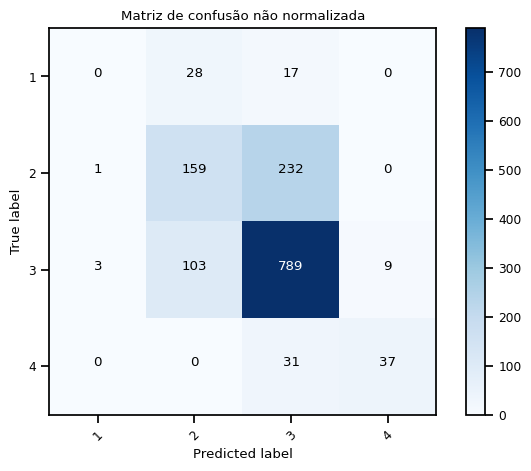

In [61]:
plot_confusion_matrix(cnf_matrix, classes=['1','2', '3', '4'],
                      title='Matriz de confusão não normalizada', normalize=False)

In [62]:
df['imdb_binned_score'].value_counts()

3    3015
2    1323
4     203
1     154
Name: imdb_binned_score, dtype: int64

In [63]:
# métricas finais
print(metrics.classification_report(y_test, y_pred, target_names=['1','2', '3', '4']))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.55      0.41      0.47       392
           3       0.74      0.87      0.80       904
           4       0.80      0.54      0.65        68

    accuracy                           0.70      1409
   macro avg       0.52      0.46      0.48      1409
weighted avg       0.66      0.70      0.67      1409



In [64]:
# pacote para salvar o modelo
import pickle

In [66]:
# qual caminho vamos salvar o modelo
modelo_treinado = 'modelo_imdb.sav'

# salvar o modelo
pickle.dump(logit, open(modelo_treinado, 'wb'))

In [67]:
# para carregar o modelo treinado
modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [68]:
# para fazer a predição com um novo dado
X_test[0]

array([-0.11125319,  0.12234245, -0.47077098, -0.56684582,  0.102644  ,
       -0.18064455, -0.29363035,  0.56016395, -0.41895874,  0.10788607,
       -0.40176212,  0.17842293, -0.14967295, -0.04276995, -0.03491087,
       -0.04276995, -0.14093771, -0.41056461, -0.65997074, -0.03903749,
        1.05121875, -0.0302291 , -0.0302291 , -0.01744746, -0.11240473,
       -0.05240624])

In [69]:
modelo_carregado.predict([X_test[0]])

array([3], dtype=int64)